# <a id='toc1_'></a>[Seminar đề tài: Predict Future Sales](#toc0_)

**Bảng nội dung**
<a id='toc0_'></a>    
- [Seminar đề tài: Predict Future Sales](#toc1_)    
  - [Thông tin người thực hiện](#toc1_0_)    
  - [Mô tả đồ án:](#toc1_1_)    
    - [<span style="color:yellow"> A. Thu thập dữ liệu</span>](#toc1_1_1_)    
      - [Ngữ cảnh thực hiện tìm kiếm dữ liệu](#toc1_1_1_1_)    
      - [Chủ đề](#toc1_1_1_2_)    
      - [Nguồn](#toc1_1_1_3_)    
      - [Người ta có cho phép sử dụng dữ liệu như thế này hay không?](#toc1_1_1_4_)    
      - [Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?](#toc1_1_1_5_)    
      - [Đọc dữ liệu](#toc1_1_1_6_)    
    - [<span style="color:yellow"> B. Khám phá dữ liệu</span>](#toc1_1_2_)    
      - [Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#toc1_1_2_1_)    
      - [Mỗi cột có ý nghĩa gì? Thông tin của mỗi cột ? Mỗi cột hiện đang có kiểu dữ liệu gì?](#toc1_1_2_2_)    
      - [Phân bố dữ liệu ở các cột](#toc1_1_2_6_)    
        - [Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?](#toc1_1_2_6_1_)    
        - [Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?](#toc1_1_2_6_2_)    
      - [Tiền xử lý dữ liệu](#toc1_1_2_7_)    
    - [<span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>](#toc1_1_4_)    
      
<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_0_'></a>[Thông tin thành viên nhóm <b style='color:red'>3emptyBox</b>](#toc0_)
|  MSSV |Họ và tên   |
|---|---|
|  20120011 |Nguyễn Hoàng Huy   |
|  20120510 |Nguyễn Hữu Anh Khoa   |
|  20120537|Trần Trung Nguyên   |
|  20120540|Võ Hoàng Thảo Nguyên   |
|  20120599|Phù Thị Kim Trang   |
|  20120623|Trần Tiến Văn   |


## <a id='toc1_1_'></a>[Mô tả đồ án:](#toc0_)
- Từ nguồn dữ liệu lấy được từ Kaggle về lịch sử bán hàng của một chuỗi cửa hàng bán lẻ tại Nga trong suốt 34 tháng, từ tháng 1 năm 2013 đến tháng 10 năm 2015. Đồ án này nhằm mục đích phân tích dữ liệu đã có để dự đoán doanh số bán hàng của từng sản phẩm của cửa hàng trong tháng tiếp theo.

---

Import các thư viện

In [14]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [12]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 10.8 MB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set(style="whitegrid")
import csv
import time
import scipy.stats as stats
import os

---

### <a id='toc1_1_1_'></a>[<span style="color:yellow"> A. Thu thập dữ liệu</span>](#toc0_)


#### <a id='toc1_1_1_1_'></a>[Ngữ cảnh thực hiện tìm kiếm dữ liệu](#toc0_)

Trong tình hình kinh tế cạnh tranh như hiện nay, việc **dự báo doanh số bán hàng** là cần thiết, nó sẽ giúp đưa ra các quyết định kinh doanh hợp lý trong tương lai. Dựa vào dự đoán số lượng sản phẩm sẽ được bán ra trong các tháng tiếp theo để sản xuất phù hợp giúp tối ưu hóa các chiến lược giá cả và tiếp cận khách hàng hiệu quả.

#### <a id='toc1_1_1_2_'></a>[Chủ đề](#toc0_)

Dự đoán doanh số bán hàng trong tương lai của các cửa hàng bán lẻ ở Nga dựa trên lịch sử bán hàng

#### <a id='toc1_1_1_3_'></a>[Nguồn](#toc0_)
Dữ liệu được lấy trên Kaggle dưới file csv, đường link dẫn đến  [Ở đây](https://www.kaggle.com/competitions/competitive-data-science-predict-future-sales/data)

#### <a id='toc1_1_1_4_'></a>[Người ta có cho phép sử dụng dữ liệu như thế này hay không?](#toc0_)

Thông tin License của dữ liệu: Open Database.

Theo thông tin License của dữ liệu, người dùng được phép tự do chia sẻ, sửa đổi và sử dụng dữ liệu trong khi duy trì sự tự do tương tự cho người dùng khác.

#### <a id='toc1_1_1_5_'></a>[Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?](#toc0_)

Việc thu thập dữ liệu có thể được thực hiện thông qua các hệ thống và các ứng dụng trên nền tảng máy tính và điện thoại di động được sử dụng bởi các cửa hàng bán lẻ.

Phương pháp thu thập dữ liệu: Không được đề cập

#### <a id='toc1_1_1_6_'></a>[Đọc dữ liệu](#toc0_)

In [26]:
df_train = pd.read_csv("./datasets/sales_train.csv")
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


---

### <a id='toc1_1_2_'></a>[<span style="color:yellow"> B. Khám phá dữ liệu</span>](#toc0_)


#### <a id='toc1_1_2_1_'></a>[Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?](#toc0_)

- Mỗi dòng dữ liệu có cùng ý nghĩa và đại diện cho một giao dịch bán hàng tại một cửa hàng bán lẻ cụ thể. Vì vậy, các dòng dữ liệu không có vấn đề về ý nghĩa khác nhau. 

- Ví dụ dòng 1: Ngày 02.01.2013 là một ngày thuộc tháng đầu tiên trong năm, shop có mã 59 đã bán 1 sản phẩm có mã 22154 với giá 999 đồng Ruble Nga.


#### <a id='toc1_1_2_2_'></a>[Mỗi cột có ý nghĩa gì?](#toc0_)
- Các trường dữ liệu trong mỗi dòng bao gồm:
  - "**date**": Ngày giao dịch (định dạng dd/mm/yyyy).
  - "**date_block_num**": Tháng trong năm tương ứng với giao dịch.
  - "**shop_id**": ID của cửa hàng bán lẻ.
  - "**item_id**": ID của sản phẩm bán hàng.
  - "**item_price**": Giá bán của sản phẩm (trong đồng Ruble Nga).
  - "**item_cnt_day**": Số lượng sản phẩm được bán trong ngày đó.

#### <a id='toc1_1_2_3_'></a>[Thông tin của mỗi cột:](#toc0_)

In [38]:
import warnings
# tắt bất kỳ cảnh báo nào có thể xuất hiện trong quá trình chạy
warnings.filterwarnings('ignore')

for column in range(6):
    print("column ", column,": ", df_train.columns[column])
    print("size: ", len(df_train.loc[:, df_train.columns[column]]))
    print("number of values: ", len(df_train.loc[:, df_train.columns[column]].unique()))

    arr= df_train.loc[:, df_train.columns[column]].unique()

    nanIndex=-1
    for index in range(len(arr)):
        if isinstance(arr[index], float) and np.isnan(arr[index]):
            nanIndex=index
            break
    if nanIndex != -1:
        arr=np.delete(arr,nanIndex)

    print("number of values (without nan): ", len(arr))

    print("data (without nan) : ", ' '.join(arr.astype(str)))
    print()



column  0 :  date
size:  2935849
number of values:  1034
number of values (without nan):  1034
data (without nan) :  02.01.2013 03.01.2013 05.01.2013 06.01.2013 15.01.2013 10.01.2013 04.01.2013 11.01.2013 07.01.2013 08.01.2013 13.01.2013 16.01.2013 26.01.2013 27.01.2013 09.01.2013 29.01.2013 12.01.2013 23.01.2013 25.01.2013 30.01.2013 19.01.2013 20.01.2013 24.01.2013 21.01.2013 22.01.2013 28.01.2013 14.01.2013 31.01.2013 17.01.2013 18.01.2013 01.01.2013 21.02.2013 14.02.2013 13.02.2013 24.02.2013 07.02.2013 02.02.2013 23.02.2013 09.02.2013 16.02.2013 15.02.2013 10.02.2013 20.02.2013 11.02.2013 22.02.2013 27.02.2013 05.02.2013 06.02.2013 04.02.2013 08.02.2013 19.02.2013 17.02.2013 18.02.2013 26.02.2013 12.02.2013 25.02.2013 28.02.2013 03.02.2013 01.02.2013 03.03.2013 06.03.2013 02.03.2013 17.03.2013 24.03.2013 10.03.2013 04.03.2013 26.03.2013 25.03.2013 15.03.2013 07.03.2013 01.03.2013 05.03.2013 31.03.2013 08.03.2013 29.03.2013 21.03.2013 16.03.2013 27.03.2013 30.03.2013 23.03.2013 22.

#### <a id='toc1_1_2_4_'></a>[Mỗi cột hiện đang có kiểu dữ liệu gì?](#toc0_)

In [33]:
df_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

#### <a id='toc1_1_2_5_'></a>[Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?](#toc0_)

Cột `date` đang có kiểu dữ liệu là `object`, cần được chuyển đổi sang kiểu ngày tháng (`datetime`).

#### <a id='toc1_1_2_6_'></a>[Phân bố dữ liệu ở các cột](#toc0_)

##### <a id='toc1_1_2_6_1_'></a>[Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?](#toc0_)

In [41]:
numerical_des = df_train.describe()
missing_ratio = pd.DataFrame({col : df_train[col].isnull().sum() / len(df_train) for col in numerical_des.columns}, index=["missing_ratio"])
pd.concat([numerical_des,missing_ratio])

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03
missing_ratio,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Từ bảng dữ liệu phân tích của kiểu dữ liệu numberic, tồn tại những trường dữ liệu với tỉ lệ thiếu như the nào?

##### <a id='toc1_1_2_6_2_'></a>[Với mỗi cột không có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?](#toc1_) [&#8593;](#toc0_)

>> Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm sinh viên cần phải xử lý như thế nào?

Quan sát thấy có số lượng lớn dữ liệu bị thiếu và có những cột phải xử lý kiểu dữ liệu do vậy ta phải tiền xử lý dữ liệu.

#### <a id='toc1_1_2_7_'></a>[Tiền xử lý dữ liệu](#toc0_)

Missing data:
Series([], dtype: float64)


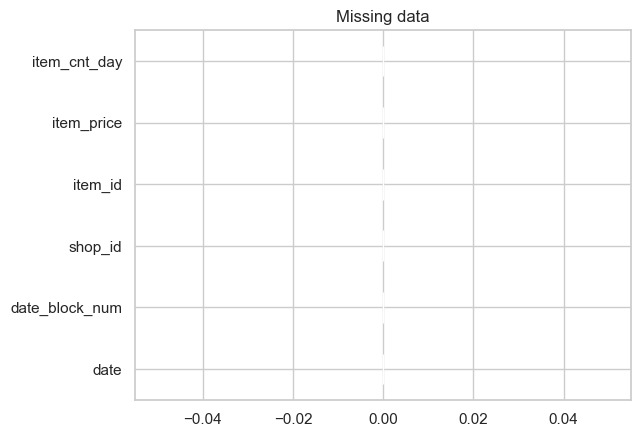

Percentage missing data:
Series([], dtype: float64)
Number of rows duplicated: 6


In [42]:
# Kiểm tra missing data
have_Nan=df_train.columns[df_train.isna().any()]

# Đếm số missing data của các cột có missing data
print("Missing data:")
print(df_train[have_Nan].isnull().sum())
df_train.isna().sum().plot(kind="barh",title='Missing data')
plt.show()

# Phần trăm dữ liệu bị thiểu của những cột này
print("Percentage missing data:")
percentage_missing_data=df_train[have_Nan].isnull().sum() * 100 / df_train.shape[0]
print(percentage_missing_data)

# Kiểm tra có dữ liệu bị duplicate không
print("Number of rows duplicated: "+str(df_train[df_train.duplicated()].shape[0]))


Không có dữ liệu bị miss 
//////////////////////
Viet nhan xet ro hon

Sau khi Xử lý kiễu dữ liệu của các cột.

- Chuyển data type của cột `date` sang dạng `datetime`.

In [43]:
# Chuyển data type của cột `date` sang dạng `datetime`.
df_train['date']=pd.to_datetime(df_train['date'])

Đã xữ lý xong kiểu dữ liệu của các cột. Giờ ta quan sát đến giá trị dữ liệu bên trong các cột.

Tiếp theo ta kiểm tra những cột có kiễu dữ liệu là số để xem có xuất hiện dữ liệu không hợp lệ không.
- Có dòng nào chứa số âm không?
- ....

In [45]:
# Kiểu tra giá trị âm


# Kiểm tra giá trị của cột không hợp lệ

Sau khi đã xử lý xong tất cả ta sắp xếp và reset index của data.

In [ ]:
# code here

### <a id='toc1_1_4_'></a>[<span style="color:yellow"> C. Khám phá mối quan hệ trong dữ liệu</span>](#toc0_)